In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('data/KMeansData.csv')
X = dataset.iloc[:,:].values
X = dataset.values
X

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


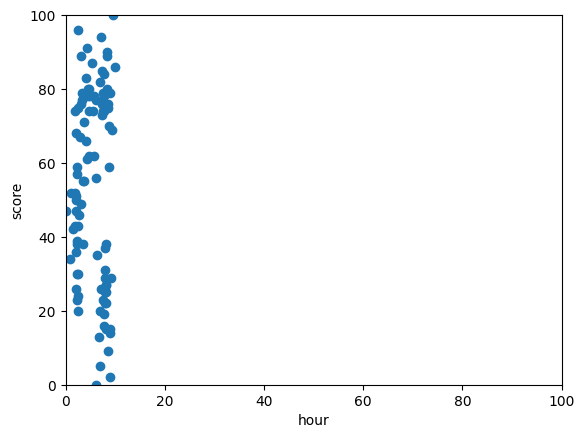

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('hour')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.64615029, -1.07514723],
       [ 0.98282328, -1.49888853],
       [ 0.09251026,  0.31164246],
       [ 1.21101275,  0.19607665],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-1.07088197, -0.30470851],
       [ 0.57133407, -1.88410788],
       [-0.76413547, -0.612884  ],
       [-0.9100271 , -0.18914271],
       [-0.50976032,  0.4657302 ],
       [ 1.37560843, -0.95958142],
       [ 0.79204192,  0.77390569],
       [-1.70307903, -0.76697174],
       [-0.68183762,  0.65833988],
       [ 1.11375166, -1.73002014],
       [-0.98484332,  0.50425214],
       [-1.34396117, -0.42027432],
       [ 0.21969783, -2.07671756],
       [ 1.09504761,  1.39025667],
       [ 0.23466107,  0.8894715 ],
       [-2.05471527, -0.26618658],
       [-1.24670009, -0.15062077],
       [-1.2167736 ,

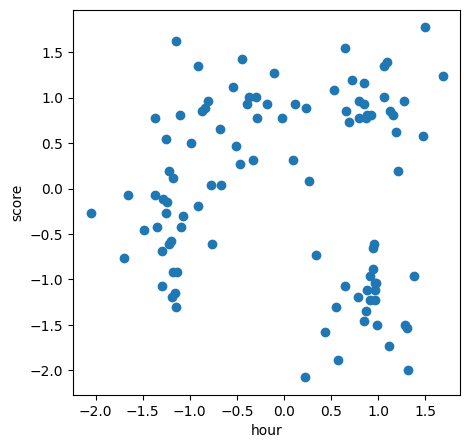

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [12]:
from sklearn.cluster import KMeans


In [69]:
K=4
kmeans = KMeans(n_clusters=K, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [67]:
centers = kmeans.cluster_centers_

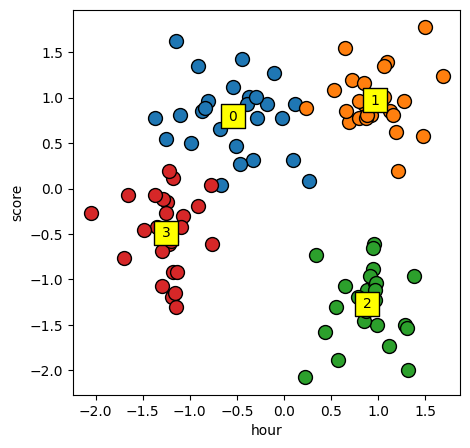

In [70]:
plt.figure(figsize=(5, 5))
for i in range(K):
  filt = y_kmeans == i
  plt.scatter(X[filt, 0], X[filt, 1], s=100, ec='black')
  plt.scatter(centers[i, 0], centers[i, 1], s=300, marker='s', color='yellow', ec='black')
  plt.text(centers[i, 0], centers[i, 1], i, ha='center', va='center')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [57]:
X_org = sc.inverse_transform(X)
centers_org = sc.inverse_transform(centers)

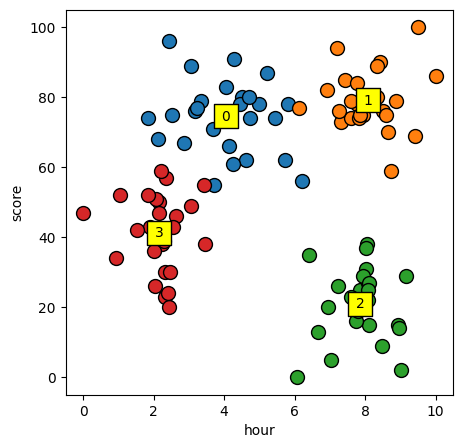

In [58]:
plt.figure(figsize=(5, 5))
for i in range(K):
  filt = y_kmeans == i
  plt.scatter(X_org[filt, 0], X_org[filt, 1], s=100, ec='black')
  plt.scatter(centers_org[i, 0], centers_org[i, 1], s=300, marker='s', color='yellow', ec='black')
  plt.text(centers_org[i, 0], centers_org[i, 1], i, ha='center', va='center')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [65]:
dataset[dataset['cluster']==1]
dataset

,hour,score,cluster
0,7.33,73,1
8,8.73,59,1
17,7.61,74,1
24,8.42,90,1
25,6.12,77,1
34,8.66,70,1
35,7.95,75,1
42,7.42,85,1
45,9.43,69,1
50,7.21,94,1


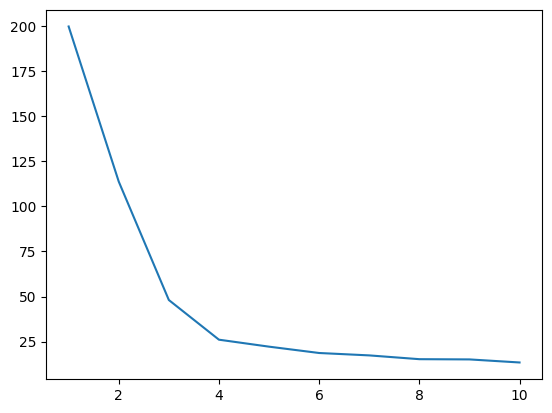

In [73]:
inertia_list=[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_list)
plt.show()